# Keras Regression Deep Learning
https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/

In [30]:
import numpy as np
from sklearn import metrics
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt


In [21]:
# load dataset
dataframe = pd.read_csv("housing.csv")
dataset = dataframe.values
dataset

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 3.9690e+02, 4.9800e+00,
        2.4000e+01],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 3.9690e+02, 9.1400e+00,
        2.1600e+01],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 3.9283e+02, 4.0300e+00,
        3.4700e+01],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 5.6400e+00,
        2.3900e+01],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 3.9345e+02, 6.4800e+00,
        2.2000e+01],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 7.8800e+00,
        1.1900e+01]])

In [22]:
# Slice to X and Y
X = dataset[:,0:13]
y = dataset[:,13]

In [23]:
X.shape, y.shape

((506, 13), (506,))

In [24]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [25]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((379, 13), (379,), (127, 13), (127,))

# Regression model with plots

In [27]:
# Regression chart.
def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

Score (RMSE): 4.701336182124711


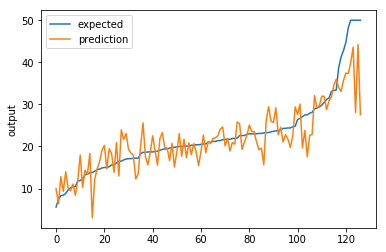

In [47]:
model = Sequential()
model.add(Dense(20, input_dim=13, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=0.00001, patience=900, verbose=1, mode='auto')
# Play around the param here to improve prediction. patience=when to stop if no improvement, min_delta=i think it's learningrate
checkpointer = ModelCheckpoint(filepath="best_weights.hdf5", verbose=0, save_best_only=True) # save best model
model.fit(X_train,y_train,validation_data=(X_test,y_test),callbacks=[monitor,checkpointer],verbose=0,epochs=1000)
model.load_weights('best_weights.hdf5') # load weights from best model

# Predict and measure RMSE
pred = model.predict(X_test)
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Score (RMSE): {}".format(score))

# Plot the chart
chart_regression(pred.flatten(),y_test)
# Noel, the X axis in the chart is not meaningful

# Bonus Classification (not image)

In [1]:
# example making new probability predictions for a classification problem
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import MinMaxScaler
# generate 2d classification dataset
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=1)
scalar = MinMaxScaler()
scalar.fit(X)
X = scalar.transform(X)
# define and fit the final model
model = Sequential()
model.add(Dense(4, input_dim=2, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(X, y, epochs=500, verbose=0)
# new instances where we do not know the answer
Xnew, _ = make_blobs(n_samples=3, centers=2, n_features=2, random_state=1)
Xnew = scalar.transform(Xnew)
# make a prediction
ynew = model.predict_proba(Xnew)
# show the inputs and predicted outputs
for i in range(len(Xnew)):
	print("X=%s, Predicted=%s" % (Xnew[i], ynew[i]))

c:\users\default.laptop-2ci68m4p\anaconda3\envs\tensorflow1\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


X=[0.89337759 0.65864154], Predicted=[0.01567296]
X=[0.29097707 0.12978982], Predicted=[0.80148834]
X=[0.78082614 0.75391697], Predicted=[0.01864755]


In [2]:
# example making new class prediction for a classification problem
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import MinMaxScaler
from numpy import array
# generate 2d classification dataset
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=1)
scalar = MinMaxScaler()
scalar.fit(X)
X = scalar.transform(X)
# define and fit the final model
model = Sequential()
model.add(Dense(4, input_dim=2, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(X, y, epochs=500, verbose=0)
# new instance where we do not know the answer
Xnew = array([[0.89337759, 0.65864154]])
# make a prediction
ynew = model.predict_classes(Xnew)
# show the inputs and predicted outputs
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

X=[0.89337759 0.65864154], Predicted=[0]
